In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


589

In [6]:
# Import requests
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d21a93a95b364b792ac8db63ea5cb91


In [8]:
# Create an empty list to hold the weather data.
city_data = list()
# Print the beginning of the logging 
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list 
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set the numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | chernyshevskiy
Processing Record 6 of Set 1 | kununurra
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | sabang
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | buritizeiro
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | mayo
Processing Record 16 of Set 1 | margate
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | saiha
Processing Record 22 of Set 1 | camopi
Processing Record 23 of Set

Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | ambatondrazaka
Processing Record 40 of Set 4 | manzhouli
Processing Record 41 of Set 4 | turukhansk
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | san patricio
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | la ronge
Processing Record 48 of Set 4 | abha
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | progreso
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | inderborskiy
City not found. Skipping...
Processing Record 3 of Set 5 | surgut
Processing Record 4 of Set 5 | lazarev
Processing Record 5 of Set 5 | yabelo
Processing Record 6 of Set 5 | zhongshu
Processing Record 7 of Set 5 | kutum
Processing Record 8 of Set 5 | henzada
City not found. Skipping...
Processing Record 9 of Set 5 | evensk
Processing Record 10 of Set 5 | fortuna
Process

Processing Record 30 of Set 8 | dali
Processing Record 31 of Set 8 | tabory
Processing Record 32 of Set 8 | westport
Processing Record 33 of Set 8 | diffa
Processing Record 34 of Set 8 | jiuquan
Processing Record 35 of Set 8 | novyy urengoy
Processing Record 36 of Set 8 | basco
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | hellvik
Processing Record 39 of Set 8 | hofn
Processing Record 40 of Set 8 | buchanan
Processing Record 41 of Set 8 | belsand
Processing Record 42 of Set 8 | ihosy
Processing Record 43 of Set 8 | yei
Processing Record 44 of Set 8 | walvis bay
Processing Record 45 of Set 8 | flin flon
Processing Record 46 of Set 8 | bull savanna
Processing Record 47 of Set 8 | koumac
Processing Record 48 of Set 8 | gornyy
Processing Record 49 of Set 8 | cravo norte
Processing Record 50 of Set 8 | kant
Processing Record 1 of Set 9 | mabaruma
Processing Record 2 of Set 9 | lyuban
Processing Record 3 of Set 9 | campo verde
Processing Record 4 of Set 9 | bar

Processing Record 16 of Set 12 | bom jesus
Processing Record 17 of Set 12 | sheboygan
Processing Record 18 of Set 12 | sfantu gheorghe
Processing Record 19 of Set 12 | dalbandin
Processing Record 20 of Set 12 | villarrica
Processing Record 21 of Set 12 | sao luis do quitunde
Processing Record 22 of Set 12 | kiunga
Processing Record 23 of Set 12 | am timan
Processing Record 24 of Set 12 | kingsville
Processing Record 25 of Set 12 | balgazyn
Processing Record 26 of Set 12 | grimshaw
Processing Record 27 of Set 12 | mocuba
Processing Record 28 of Set 12 | dalvik
Processing Record 29 of Set 12 | bridlington
Processing Record 30 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 31 of Set 12 | aykhal
Processing Record 32 of Set 12 | havre-saint-pierre
Processing Record 33 of Set 12 | pudozh
Processing Record 34 of Set 12 | lenger
Processing Record 35 of Set 12 | novaya malykla
Processing Record 36 of Set 12 | marsh harbour
Processing Record 37 of Set 12 | sinnamary
Processing

In [9]:
len(city_data)

536

In [10]:
city_data

[{'City': 'Kruisfontein',
  'Lat': -34,
  'Lng': 24.73,
  'Max Temp': 48.99,
  'Humidity': 91,
  'Cloudiness': 0,
  'Wind Speed': 1.01,
  'Country': 'ZA',
  'Date': '2020-10-30 22:50:16'},
 {'City': 'Butaritari',
  'Lat': 3.07,
  'Lng': 172.79,
  'Max Temp': 82.56,
  'Humidity': 77,
  'Cloudiness': 70,
  'Wind Speed': 21.45,
  'Country': 'KI',
  'Date': '2020-10-30 22:50:16'},
 {'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 84,
  'Humidity': 69,
  'Cloudiness': 75,
  'Wind Speed': 9.17,
  'Country': 'US',
  'Date': '2020-10-30 22:50:17'},
 {'City': 'Chernyshevskiy',
  'Lat': 63.01,
  'Lng': 112.47,
  'Max Temp': -4.34,
  'Humidity': 91,
  'Cloudiness': 84,
  'Wind Speed': 5.21,
  'Country': 'RU',
  'Date': '2020-10-30 22:50:17'},
 {'City': 'Kununurra',
  'Lat': -15.77,
  'Lng': 128.73,
  'Max Temp': 84.2,
  'Humidity': 74,
  'Cloudiness': 58,
  'Wind Speed': 1.12,
  'Country': 'AU',
  'Date': '2020-10-30 22:50:17'},
 {'City': 'Mataura',
  'Lat': -46.19,
  'Lng': 168.

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.00,24.73,48.99,91,0,1.01,ZA,2020-10-30 22:50:16
1,Butaritari,3.07,172.79,82.56,77,70,21.45,KI,2020-10-30 22:50:16
2,Kapaa,22.08,-159.32,84.00,69,75,9.17,US,2020-10-30 22:50:17
3,Chernyshevskiy,63.01,112.47,-4.34,91,84,5.21,RU,2020-10-30 22:50:17
4,Kununurra,-15.77,128.73,84.20,74,58,1.12,AU,2020-10-30 22:50:17
5,Mataura,-46.19,168.86,54.00,98,100,10.00,NZ,2020-10-30 22:47:07
6,Hobart,-42.88,147.33,62.01,76,20,5.82,AU,2020-10-30 22:47:01
7,Sabang,5.89,95.32,82.00,77,60,15.01,ID,2020-10-30 22:50:17
8,Salalah,17.02,54.09,75.20,69,0,6.93,OM,2020-10-30 22:50:17
9,Buritizeiro,-17.35,-44.96,75.16,85,100,4.52,BR,2020-10-30 22:50:10


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2020-10-30 22:50:16,-34.00,24.73,48.99,91,0,1.01
1,Butaritari,KI,2020-10-30 22:50:16,3.07,172.79,82.56,77,70,21.45
2,Kapaa,US,2020-10-30 22:50:17,22.08,-159.32,84.00,69,75,9.17
3,Chernyshevskiy,RU,2020-10-30 22:50:17,63.01,112.47,-4.34,91,84,5.21
4,Kununurra,AU,2020-10-30 22:50:17,-15.77,128.73,84.20,74,58,1.12


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

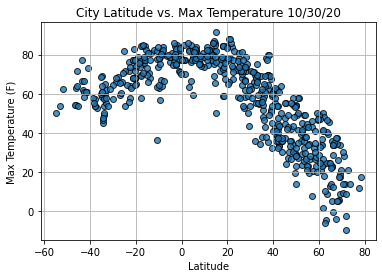

In [17]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

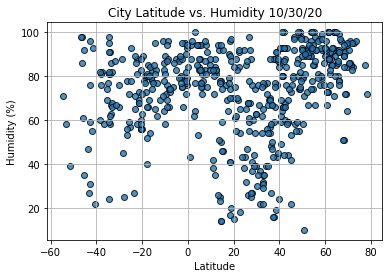

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

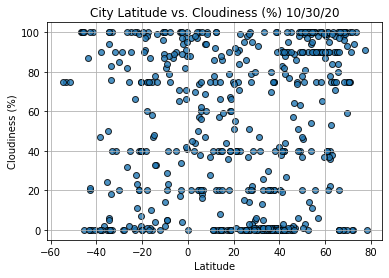

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

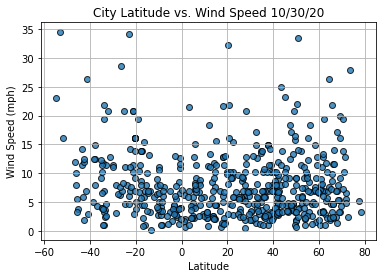

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [22]:
index13 = city_data_df.loc[13]
index13

City                         Mayo
Country                        US
Date          2020-10-30 22:50:17
Lat                         38.89
Lng                        -76.51
Max Temp                     51.8
Humidity                       76
Cloudiness                      1
Wind Speed                  11.41
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >=0

0      False
1       True
2       True
3       True
4      False
       ...  
531     True
532     True
533     True
534     True
535     True
Name: Lat, Length: 536, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2020-10-30 22:50:16,3.07,172.79,82.56,77,70,21.45
2,Kapaa,US,2020-10-30 22:50:17,22.08,-159.32,84.00,69,75,9.17
3,Chernyshevskiy,RU,2020-10-30 22:50:17,63.01,112.47,-4.34,91,84,5.21
7,Sabang,ID,2020-10-30 22:50:17,5.89,95.32,82.00,77,60,15.01
8,Salalah,OM,2020-10-30 22:50:17,17.02,54.09,75.20,69,0,6.93
...,...,...,...,...,...,...,...,...,...
531,Novaya Malykla,RU,2020-10-30 22:50:53,54.20,49.95,38.05,78,95,4.99
532,Marsh Harbour,BS,2020-10-30 22:48:05,26.54,-77.06,81.07,78,3,9.35
533,Sinnamary,GF,2020-10-30 22:50:53,5.38,-52.95,81.28,83,38,12.84
534,Ninotsminda,GE,2020-10-30 22:50:53,41.26,43.59,41.00,80,40,10.29


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

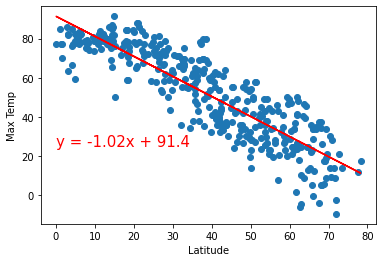

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,25))

In [51]:
linregress(x_values, y_values)

LinregressResult(slope=-1.0245721315227587, intercept=91.399355491932, rvalue=-0.8750883373425408, pvalue=7.003897229961236e-121, stderr=0.02918316084249593)

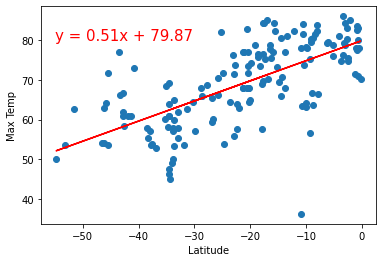

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,80))

In [53]:
linregress(x_values, y_values)

LinregressResult(slope=0.5056066074627299, intercept=79.86662254616292, rvalue=0.6667894908702646, pvalue=1.5316222370960097e-21, stderr=0.045389757996809964)

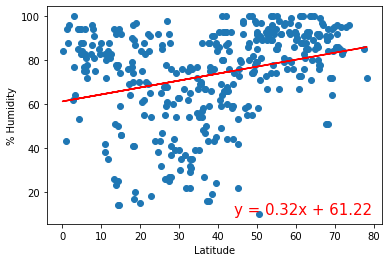

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(44,10))


In [56]:
linregress(x_values, y_values)

LinregressResult(slope=0.3168234041333193, intercept=61.21649680523595, rvalue=0.29260378136095727, pvalue=6.432481413923292e-09, stderr=0.05332498287032498)

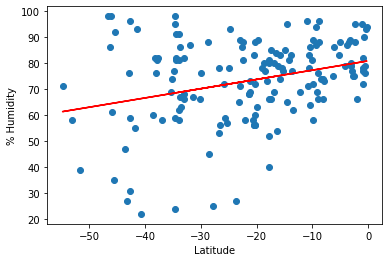

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [65]:
linregress(x_values, y_values)

LinregressResult(slope=0.35583475741007653, intercept=80.82906852523581, rvalue=0.3030824884822194, pvalue=0.0001141222162100796, stderr=0.08986660113565705)

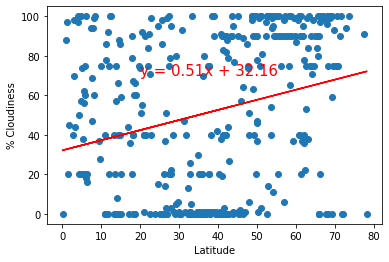

In [72]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Clodiness', '% Cloudiness',(20,70))
                                                                                                       

In [73]:
linregress(x_values, y_values)

LinregressResult(slope=0.511195641008681, intercept=32.160575547449525, rvalue=0.25856318813423873, pvalue=3.3234660570223627e-07, stderr=0.09836132208833039)

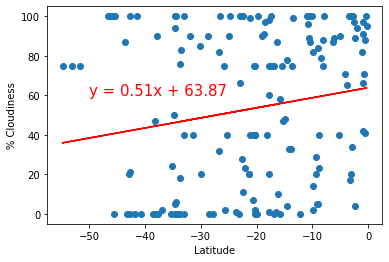

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [76]:
linregress(x_values, y_values)

LinregressResult(slope=0.5093488669418036, intercept=63.86572012546012, rvalue=0.1796226275442059, pvalue=0.024384248610378384, stderr=0.2240612911192354)

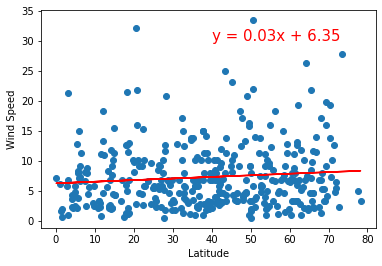

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

In [79]:
linregress(x_values, y_values)

LinregressResult(slope=0.026590144601065624, intercept=6.345457281384894, rvalue=0.09938803784437385, pvalue=0.05320214850210253, stderr=0.013710720147506014)

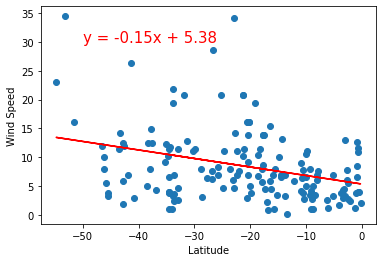

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))

In [82]:
linregress(x_values, y_values)

LinregressResult(slope=-0.147475186390022, intercept=5.3797137166124935, rvalue=-0.32623471598300796, pvalue=3.049942103730264e-05, stderr=0.03432317395744476)